Bit plane for basic MNSIT image.

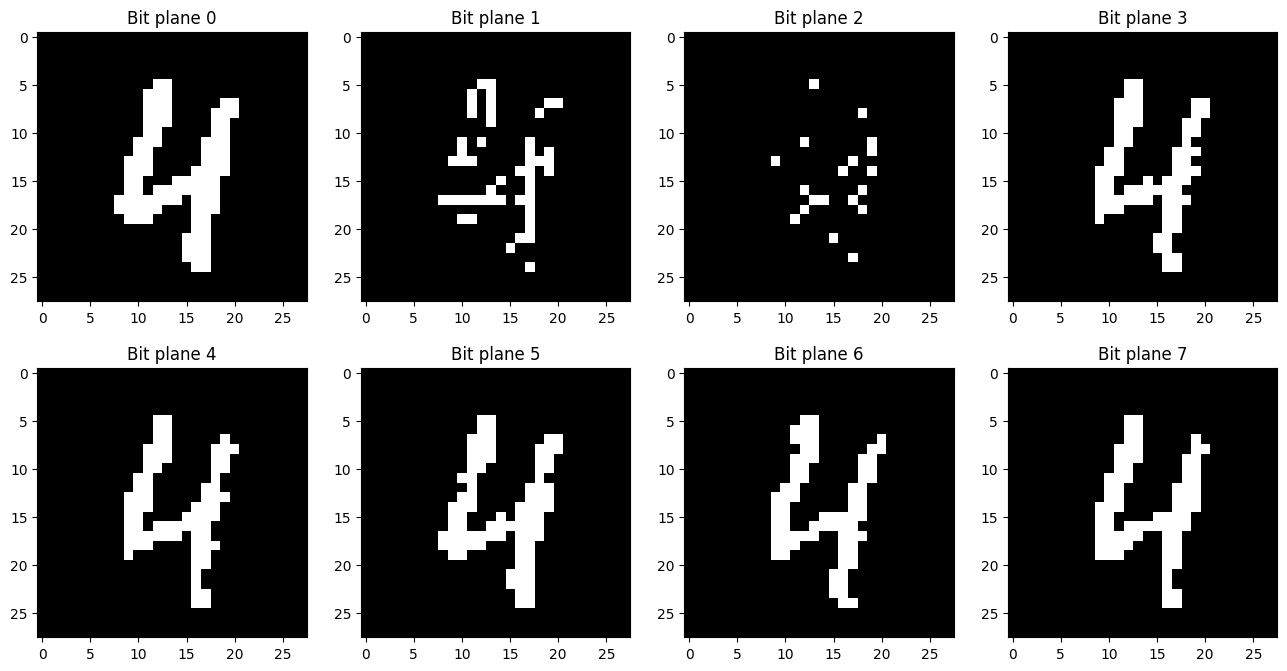

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    '''Read image'''
    img = plt.imread(path)
    return img

def extract_bit_planes(Y):
    '''This function extracts 8 bit planes'''
    Y_8bit = (Y * 255).astype(np.uint8) # Convert Y to 8 bit
    
    bit_planes = []
    for i in range(8):
        bit_plane = (Y_8bit >> i) & 1 # take a bit plane
        bit_planes.append(bit_plane)
    
    return bit_planes

def display_bit_planes(image_path, output_path):
    
    img = load_image(image_path)
    
    # Convert image to grayscale if it has RGB channels
    if img.ndim == 3:
        Y = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
    else:
        Y = img
    
    bit_planes = extract_bit_planes(Y)

    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    axs = axs.ravel()

    for i in range(8):
        axs[i].imshow(bit_planes[i], cmap='gray')
        axs[i].set_title(f"Bit plane {i}")

    # plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.show()

# Path to the uploaded image
image_path = "../../picture_for_test/pic4.png"  
output_path = "img/Bit_plane.jpg"

display_bit_planes(image_path, output_path)

Bit plane for normalise image.

Predicted Digit = 4
True Digit = 4


/var/folders/5b/nld3r4fx24sd8nn5x3czjhvh0000gn/T/ipykernel_41838/2671522427.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('epoh_10000

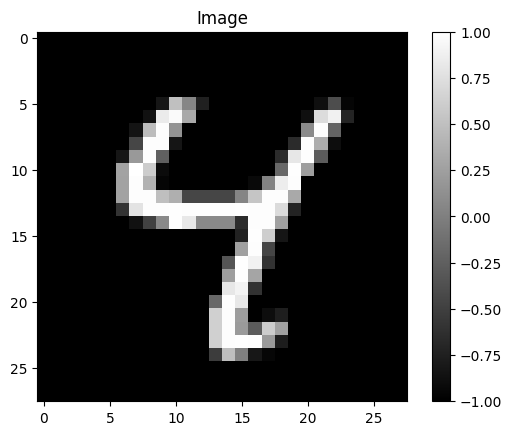

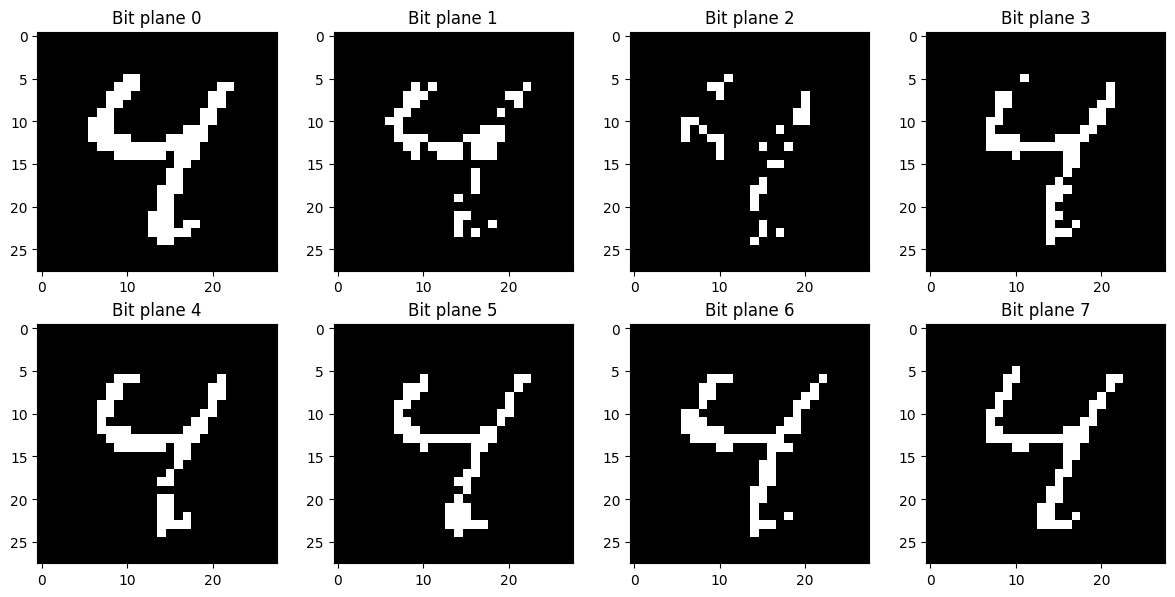

In [1]:
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn as nn

input_size = 784
output_size = 10

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=10000, shuffle=False)

model = nn.Sequential(
    nn.Linear(input_size, output_size),
    nn.Softmax(dim=1)
)

model.load_state_dict(torch.load('epoh_10000_data_10000.pth'))
model.eval()

img, label = valset[6]
img = img.view(1, -1)

with torch.no_grad():
    logps = model(img)

ps = logps
probab = list(ps.numpy()[0])
print(f"Predicted Digit = {probab.index(max(probab))}")
print(f"True Digit = {label}")

def extract_bit_planes(image_tensor):
    '''Extracts 8 bit planes from a grayscale image tensor'''
    image = image_tensor.squeeze().numpy() * 255  
    image = image.astype(np.uint8)  

    bit_planes = []
    for i in range(8):
        bit_plane = (image >> i) & 1  
        bit_planes.append(bit_plane)
    
    return bit_planes

bit_planes = extract_bit_planes(img.view(28, 28))

fig, ax = plt.subplots()
plt.imshow(img.view(28, 28).numpy(), cmap="gray")
plt.colorbar()
plt.title("Image")
plt.show()

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.ravel()
for i in range(8):
    axs[i].imshow(bit_planes[i], cmap='gray')
    axs[i].set_title(f"Bit plane {i}")
plt.tight_layout()
plt.show()


Bit plane for all string in weight array.

/var/folders/5b/nld3r4fx24sd8nn5x3czjhvh0000gn/T/ipykernel_41838/1740740337.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('epoh_10000

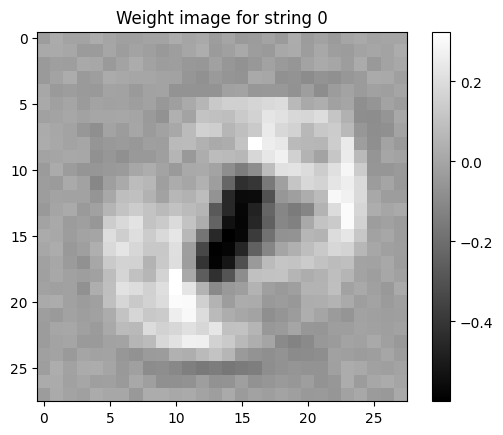

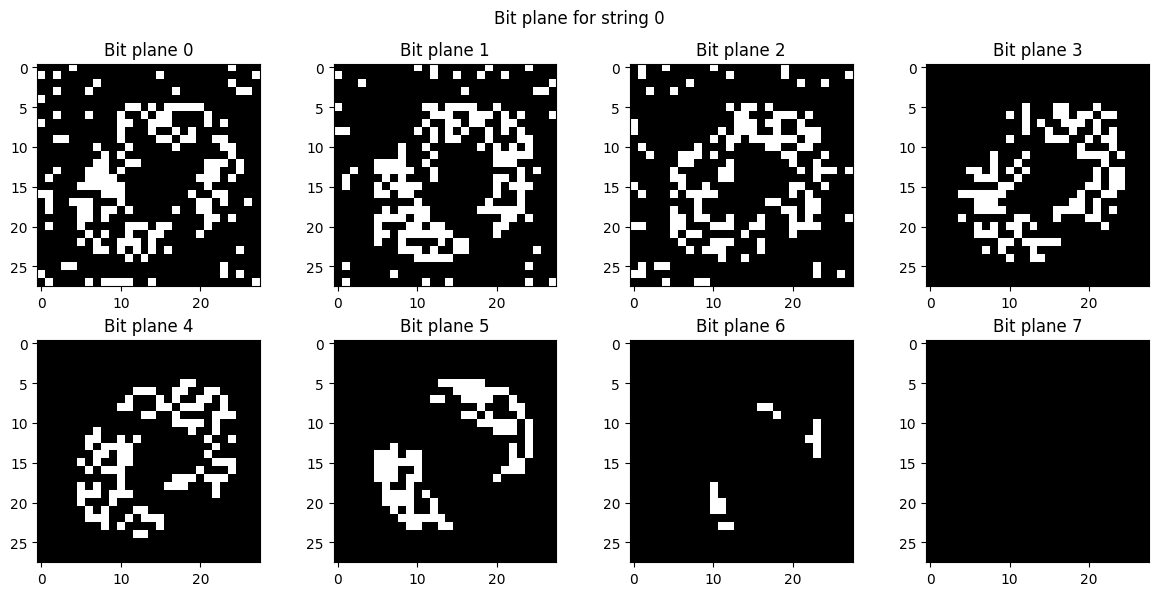

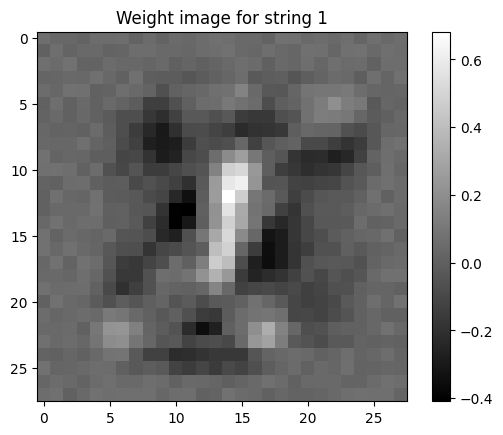

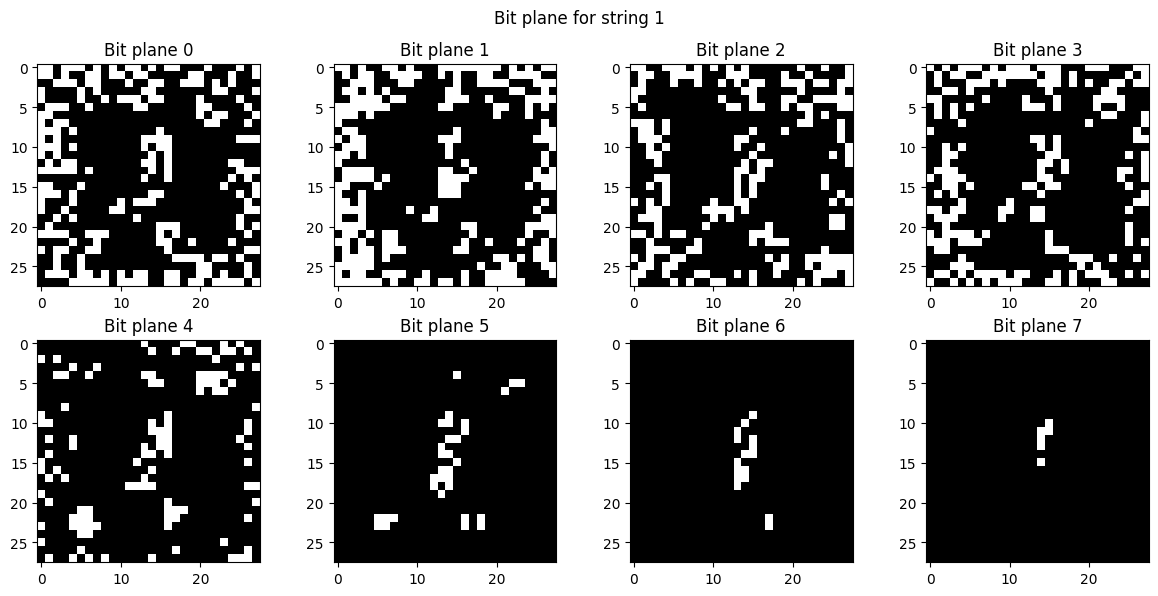

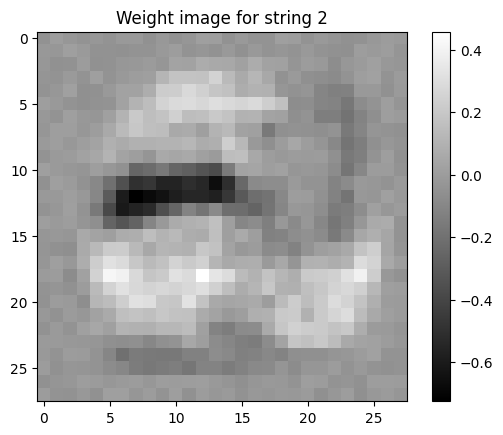

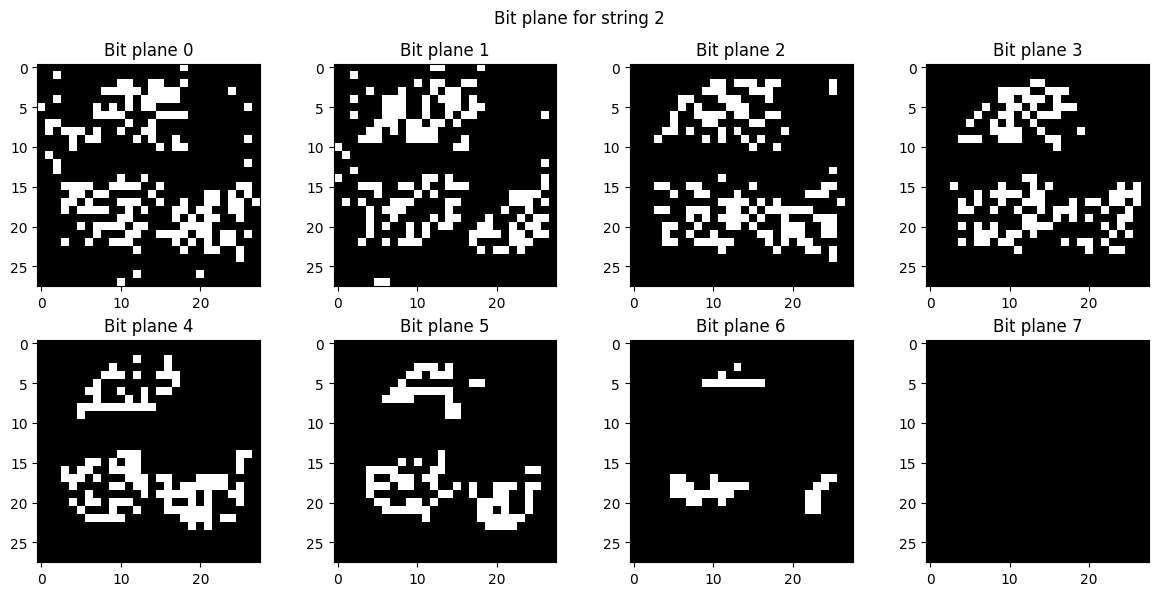

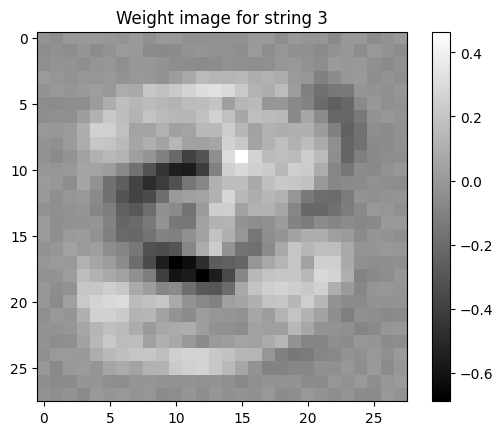

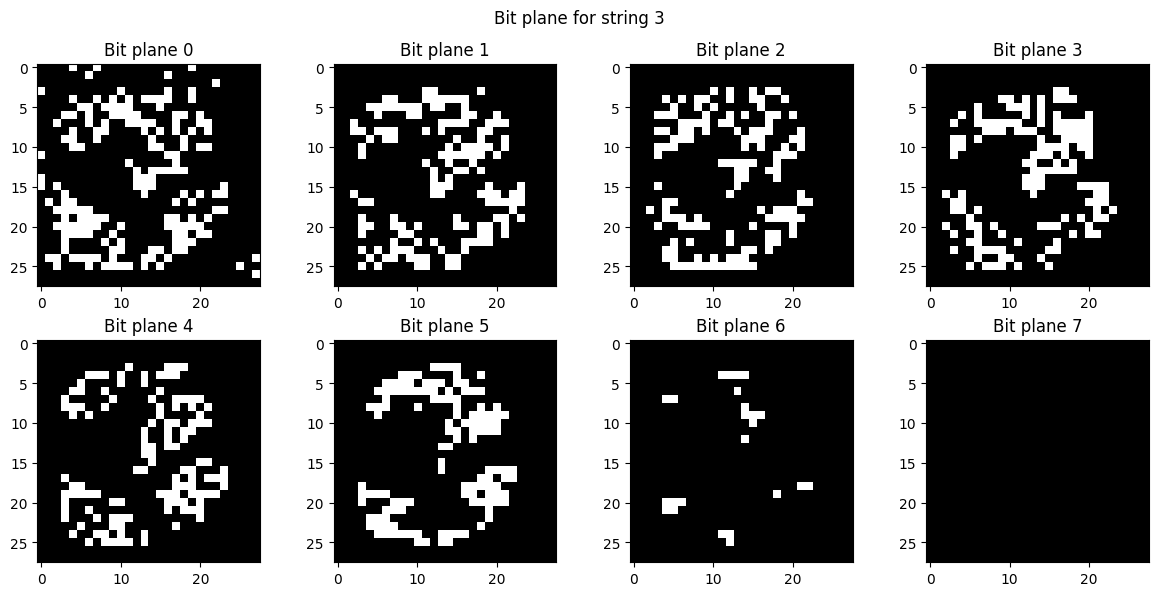

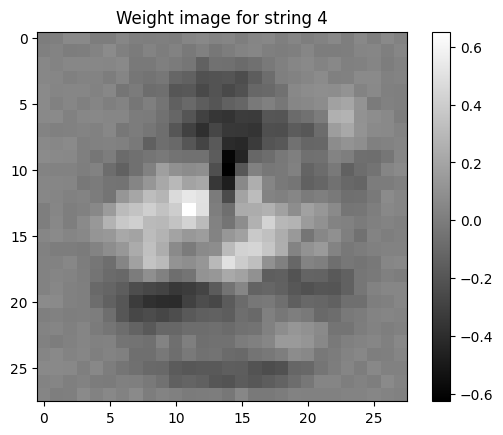

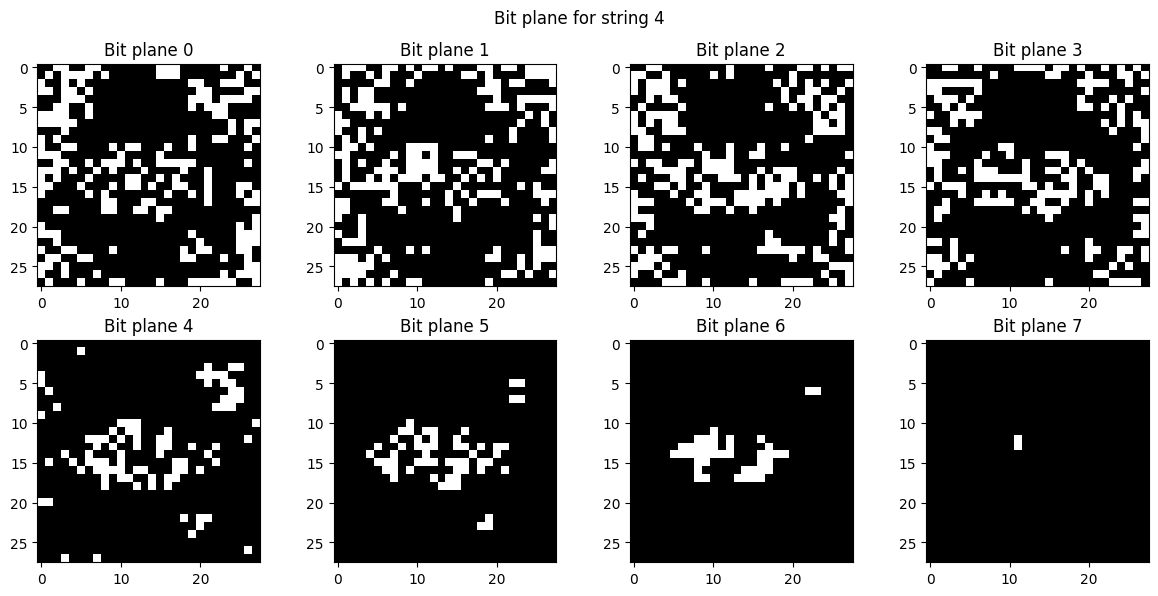

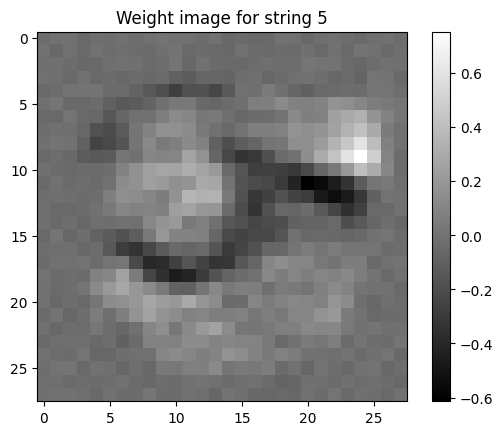

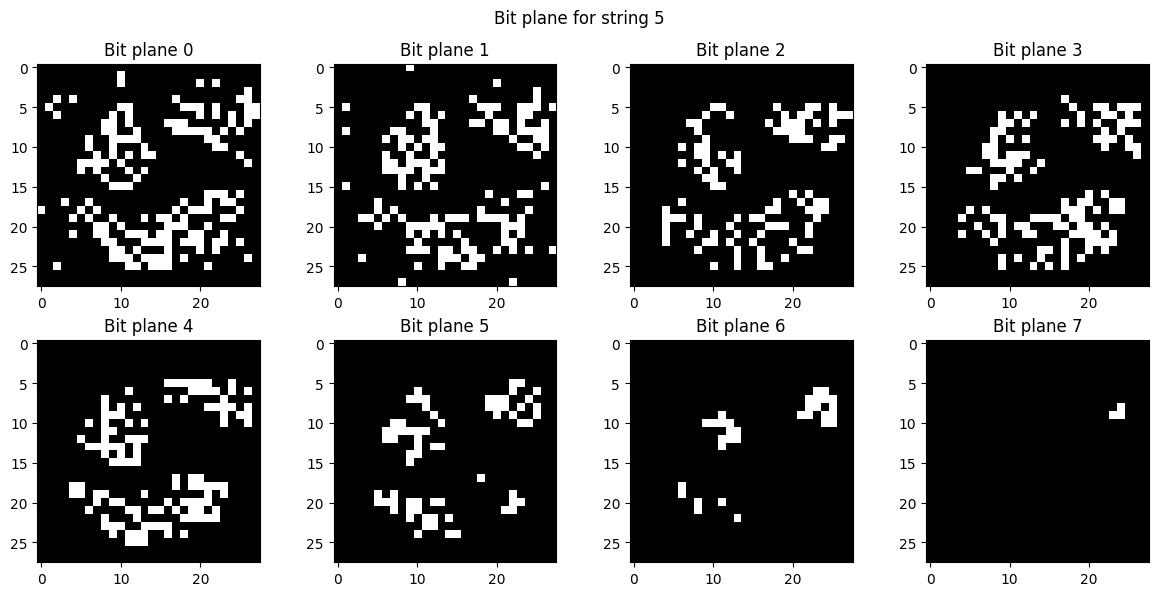

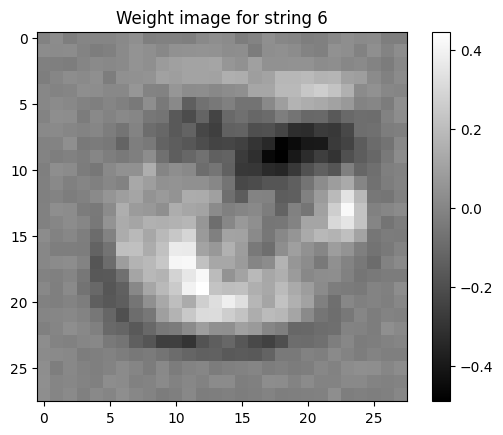

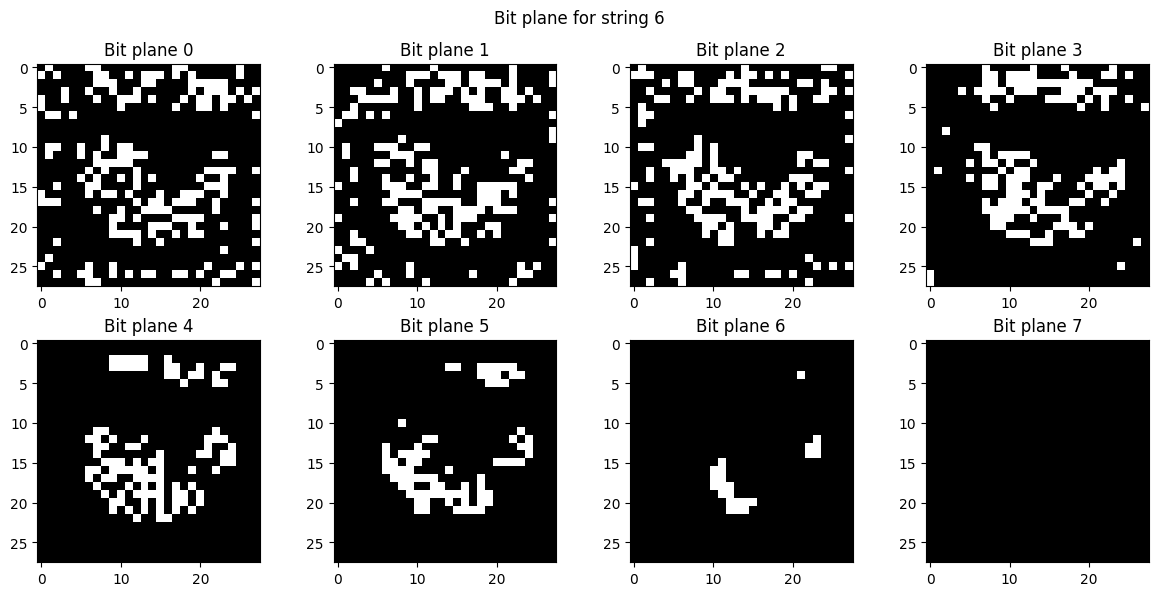

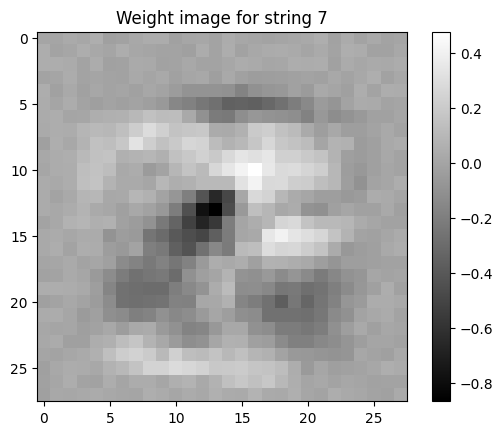

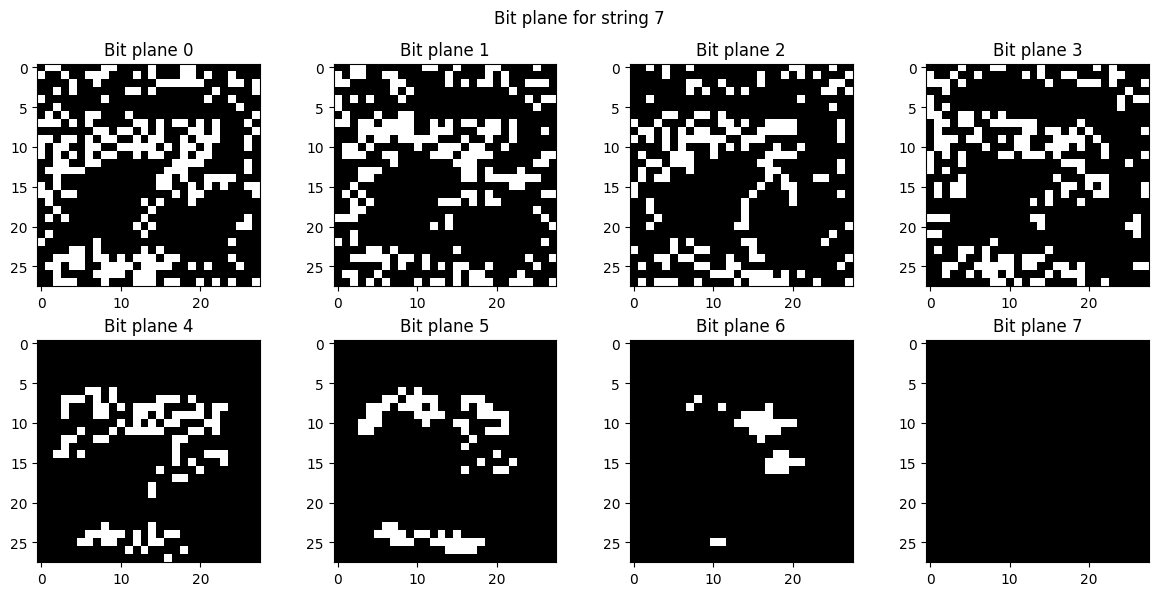

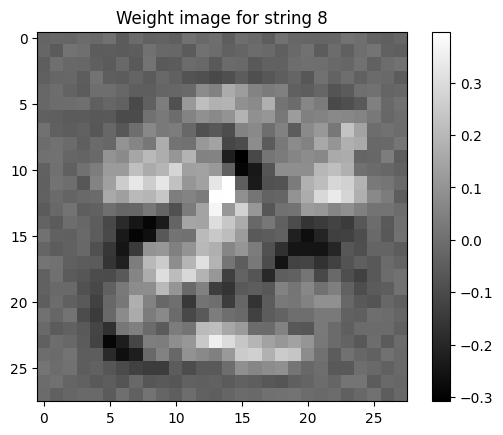

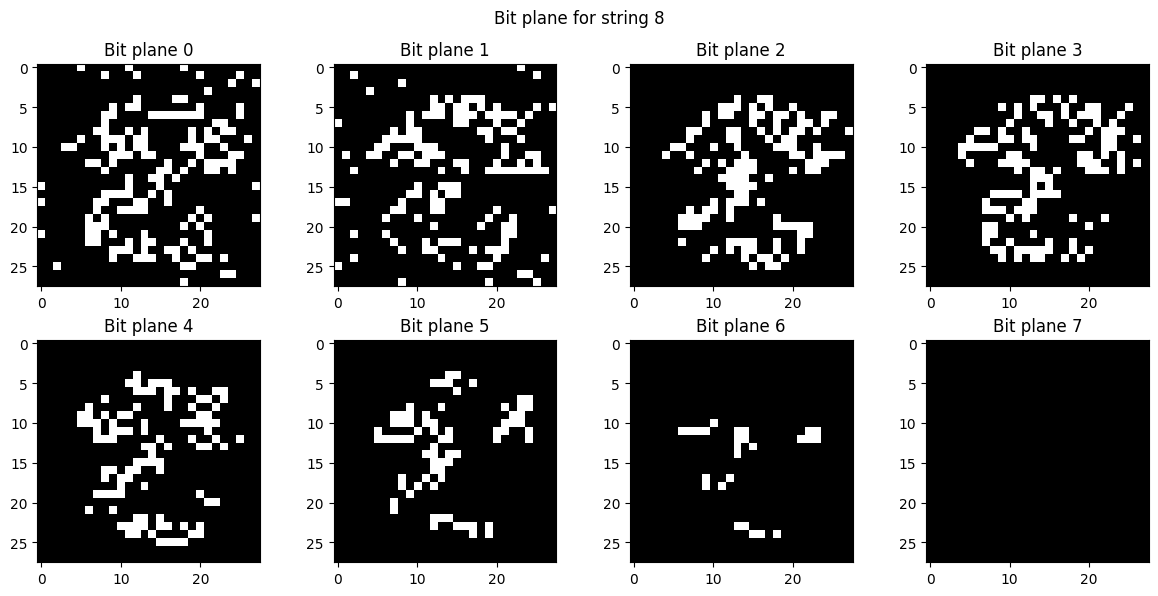

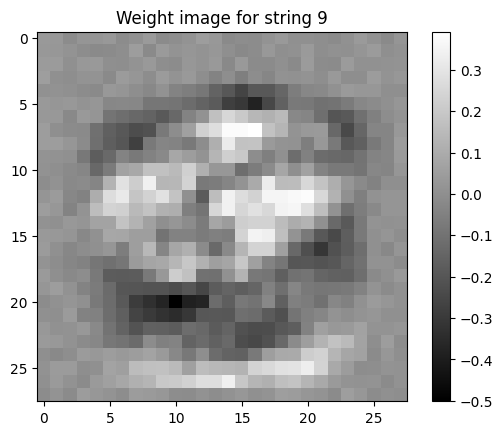

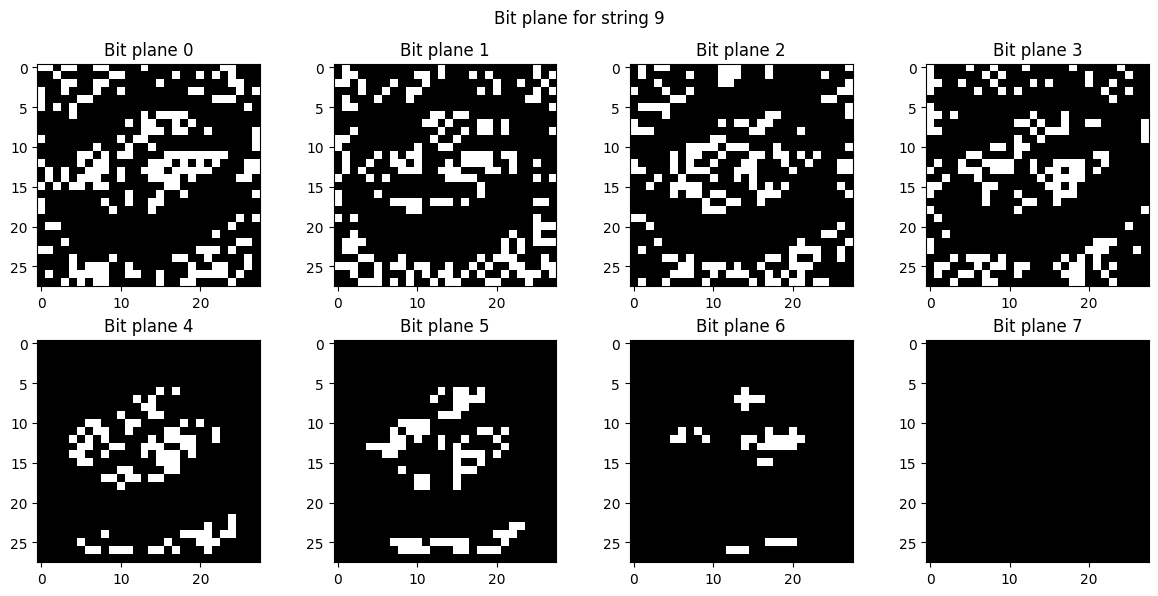

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

input_size = 784
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, output_size),
    nn.Softmax(dim=1)
)

model.load_state_dict(torch.load('epoh_10000_data_10000.pth'))
model.eval()

weights = model[0].weight.data.numpy()

def extract_bit_planes(image):
    '''Extracts 8 bit planes from a grayscale image array'''
    image = (image * 255).astype(np.uint8) 
    bit_planes = []
    for i in range(8):
        bit_plane = (image >> i) & 1 
        bit_planes.append(bit_plane)
    return bit_planes

for i in range(output_size):
    weight_image = weights[i].reshape(28, 28)
    
    bit_planes = extract_bit_planes(weight_image)
    
    fig, ax = plt.subplots()
    plt.imshow(weight_image, cmap="gray")
    plt.colorbar()
    plt.title(f"Weight image for string {i}")
    plt.show()
    
    fig, axs = plt.subplots(2, 4, figsize=(12, 6))
    axs = axs.ravel()
    for j in range(8):
        axs[j].imshow(bit_planes[j], cmap='gray')
        axs[j].set_title(f"Bit plane {j}")
    plt.suptitle(f"Bit plane for string {i}")
    plt.tight_layout()
    plt.show()
